In [3]:
# importação do pandas para trabalhar com calcúlos no modelo
import numpy as np
# importação do pandas para realizar a analisse dos dados
import pandas as pd
from IPython.display import display
# biblioteca do panda com o objetivo de ler CSV´s
from pandas import read_csv
# bilioteca do para manpulação de variaveis de hora
import datetime

import matplotlib.pyplot as plt
# biblioteca de visualização de dados para deixar os gráficos do matplotlib mais bonitos
import seaborn as sns
from matplotlib import pyplot
from matplotlib.pylab import rcParams

import warnings
import itertools

# gráficos gerados sejam mostrados no notebook e não em uma nova janela
%matplotlib inline

# definição do tipo de estilo dos gráficos gerados pelo matplotlib
plt.style.use('bmh')

# importação da bilioteca relativedelt para trabalhar com mamipulação de datas
from dateutil.relativedelta import relativedelta

# importação da função para trabalhar com o statsmodels no modelo de time series forecasting
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

## Escolhi o dataset Shanghai license plate bidding price prediction para construir o meu modelo do capstone. Esse é um dataset que pertence ao Kaggle.

O aumento da propriedade e uso de automóveis na China nas últimas duas décadas aumentou o consumo de energia, piora a poluição do ar e congestionamento exacerbado. O governo de Xangai adotou um sistema de leilão para limitar o número de placas emitidas para cada mês. O conjunto de dados contém dados históricos de leilões de janeiro de 2002 a outubro de 2017.

como funciona o sistema de leilão: um preço inicial é dado no início do leilão, os licitantes só podem oferecer até 3 vezes por cada leilão e só podem marcar para cima ou para baixo dentro de 300 CNY (aproximadamente 46 USD) por cada lance. No final de cada leilão, apenas o n superior (número de placas que serão emitidas para o mês) receberá as placas de licença ao custo de suas propostas. A oferta n. ° será o preço mais baixo do mês. Por favor, note que os leilões são realizados on-line e cada licitante não poderá ver outros lances.

Colunas:

Data: janeiro de 2002 a outubro de 2017 (observe que faltam em fevereiro de 2008)

* num_bidder *: número de cidadãos que participam do leilão para o mês

* num_plates *: número de placas que serão emitidas pelo governo para o mês

* low_deal_price *: explicado acima, em CNY

* avg_deal_price *: preço médio do negócio, no CNY (observe que, como cada lance só pode ser marcado para cima ou para baixo no prazo de 300, não está se afastando muito do preço mais baixo)

O objetivo é prever o preço low_deal_ para cada mês, o resultado real será atualizado no final de cada mês

o conjunto de dados é raspado de http://www.51chepai.com.cn/paizhaojiage/

Contato: ran_su147@hotmail.com

## Inicios das implementações

In [209]:
# Fazer a leitura do dataset
data_test = pd.read_csv('license_plates_acution_data.csv')

In [210]:
# Exibir os 5 primeiros resultados do dataset
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,0,2002.1,14735,13600,3718,1400
1,1,2002.2,14057,13100,4590,1800
2,2,2002.3,14662,14300,5190,2000
3,3,2002.4,16334,16000,4806,2300
4,4,2002.5,18357,17800,4665,2350


In [211]:
# print the column labels in the dataframe
for i, v in enumerate(data_test.columns):
    print(i, v)

0 Unnamed: 0
1 Date
2 avg_deal_price
3 lowest_deal_price
4 num_bidder
5 num_plates


In [212]:
# isto retorna uma tupla com as mesmas dimensões do dataframe
data_test.shape

(189, 6)

In [213]:
# isto retorna os tipos de dados das colunas
data_test.dtypes

Unnamed: 0             int64
Date                 float64
avg_deal_price         int64
lowest_deal_price      int64
num_bidder             int64
num_plates             int64
dtype: object

In [215]:
# embora o tipo de dados da coluna 'diagnosis' pareça ser 'object', 
# uma investigação mais profunda revela que se trata de uma string
type(data_test['avg_deal_price'][0])

numpy.int64

In [216]:
# isto retorna o número de valores únicos em cada coluna
data_test.nunique()

Unnamed: 0           189
Date                 175
avg_deal_price       189
lowest_deal_price    159
num_bidder           189
num_plates            85
dtype: int64

In [217]:
# isto retorna estatísticas descritivas úteis para cada coluna de dados
data_test.describe()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.000000,2009.814233,51632.867725,50431.216931,56142.423280,7336.111111
std,54.703748,4.612254,22548.372228,23574.450403,78988.734651,2468.294304
min,0.000000,2002.100000,14057.000000,100.000000,3525.000000,1400.000000
25%,47.000000,2005.900000,34684.000000,33100.000000,10170.000000,5690.000000
50%,94.000000,2009.900000,42262.000000,41900.000000,18575.000000,7500.000000
75%,141.000000,2013.800000,74113.000000,74000.000000,41946.000000,9000.000000
max,188.000000,2017.900000,93540.000000,93500.000000,277889.000000,16000.000000


In [218]:
# isso também se aplica ao comando `.tail()` que retorna as últimas linhas do dataframe
data_test.tail(2)

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
187,187,2017.9,91415,91300,250566,12413
188,188,2017.1,93540,93500,244868,11388


In [219]:
# isto exibe um resumo conciso do dataframe,
# incluindo o número de valores não-nulos em cada coluna
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
Unnamed: 0           189 non-null int64
Date                 189 non-null float64
avg_deal_price       189 non-null int64
lowest_deal_price    189 non-null int64
num_bidder           189 non-null int64
num_plates           189 non-null int64
dtypes: float64(1), int64(5)
memory usage: 8.9 KB


In [220]:
# criação da coluna mean que vai ser a coluna sem valores nulos
mean = data_test['avg_deal_price'].mean()
data_test['test_forecasting'] = data_test['avg_deal_price'].fillna(mean)

In [221]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,test_forecasting
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


In [222]:
# mudando o nome das solunas
# data_test.columns = ['mes', 'passageiros', 'passageiros_limpo']

In [223]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,test_forecasting
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


In [224]:
# data_test['forecast'] = 0

In [225]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,test_forecasting
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


In [226]:
# Soma dos valores de um DataFrame
data_test.sum()

Unnamed: 0              17766.00
Date                   379854.89
avg_deal_price        9758612.00
lowest_deal_price     9531500.00
num_bidder           10610918.00
num_plates            1386525.00
test_forecasting      9758612.00
dtype: float64

In [227]:
# Menor valor de um DataFrame
data_test.min()

Unnamed: 0               0.0
Date                  2002.1
avg_deal_price       14057.0
lowest_deal_price      100.0
num_bidder            3525.0
num_plates            1400.0
test_forecasting     14057.0
dtype: float64

In [228]:
# Maior valor
data_test.max()

Unnamed: 0              188.0
Date                   2017.9
avg_deal_price        93540.0
lowest_deal_price     93500.0
num_bidder           277889.0
num_plates            16000.0
test_forecasting      93540.0
dtype: float64

In [229]:
#Resumo estatístico do DataFrame, com quartis, mediana, etc.
data_test.describe()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,test_forecasting
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.000000,2009.814233,51632.867725,50431.216931,56142.423280,7336.111111,51632.867725
std,54.703748,4.612254,22548.372228,23574.450403,78988.734651,2468.294304,22548.372228
min,0.000000,2002.100000,14057.000000,100.000000,3525.000000,1400.000000,14057.000000
25%,47.000000,2005.900000,34684.000000,33100.000000,10170.000000,5690.000000,34684.000000
50%,94.000000,2009.900000,42262.000000,41900.000000,18575.000000,7500.000000,42262.000000
75%,141.000000,2013.800000,74113.000000,74000.000000,41946.000000,9000.000000,74113.000000
max,188.000000,2017.900000,93540.000000,93500.000000,277889.000000,16000.000000,93540.000000


In [230]:
# função para ver se existem itens duplicados
data_test.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
Length: 189, dtype: bool

In [231]:
# função para fazer a contagem dos dados duplicados, não se aplica aqui
sum(data_test.duplicated())

0

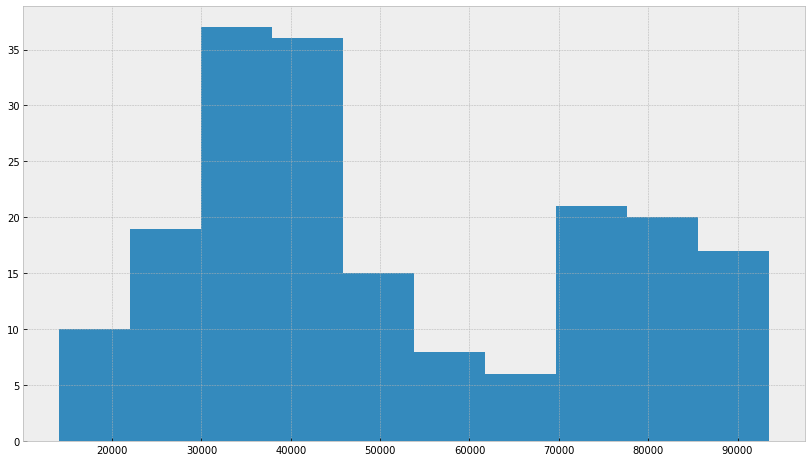

In [232]:
data_test['avg_deal_price'].hist(figsize=(14, 8))

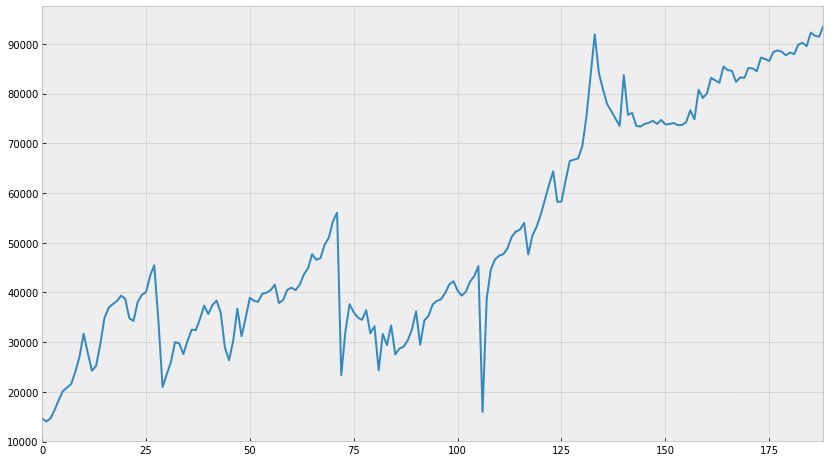

In [233]:
data_test['avg_deal_price'].plot(kind='line', figsize=(14, 8));

In [236]:
data_test['avg_deal_price'].value_counts()

28927    1
73872    1
80803    1
47700    1
44627    1
30033    1
55632    1
74830    1
35661    1
38054    1
30282    1
38728    1
92250    1
34887    1
14662    1
43333    1
47399    1
79099    1
35905    1
40518    1
76093    1
38460    1
74939    1
74075    1
34684    1
58227    1
80759    1
40053    1
38771    1
33394    1
        ..
84101    1
64367    1
23370    1
66946    1
41601    1
35317    1
58271    1
27040    1
73633    1
86946    1
40380    1
34491    1
33224    1
62559    1
38326    1
18357    1
45492    1
84572    1
34226    1
31665    1
85424    1
80020    1
29100    1
32425    1
20904    1
38311    1
25254    1
41637    1
32169    1
58625    1
Name: avg_deal_price, Length: 189, dtype: int64

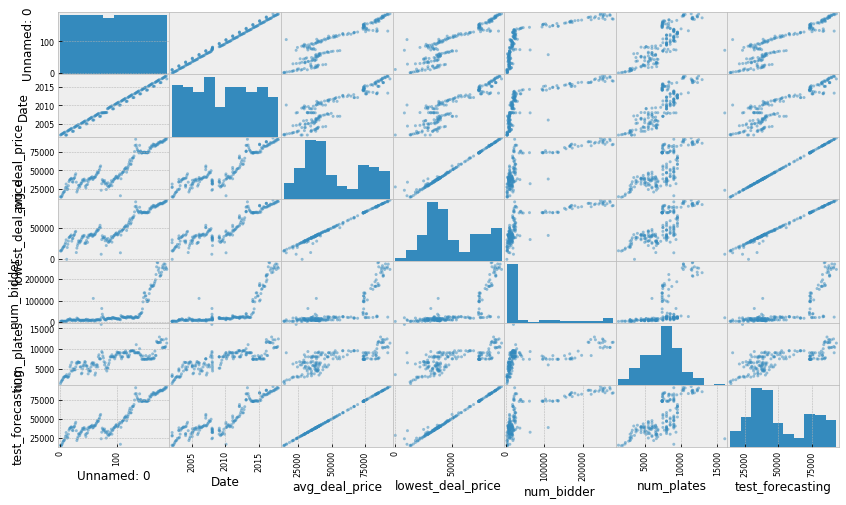

In [237]:
pd.plotting.scatter_matrix(data_test, figsize=(14, 8));

In [238]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,test_forecasting
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


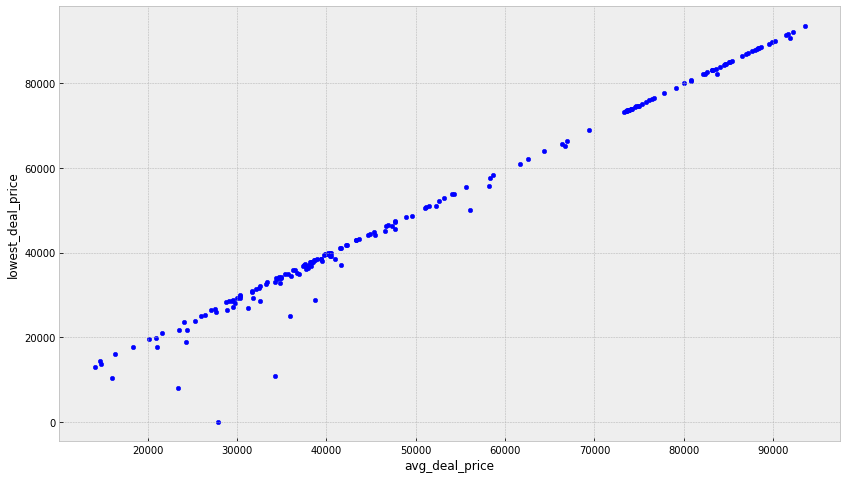

In [239]:
data_test.plot(x='avg_deal_price', y='lowest_deal_price', kind='scatter', figsize=(14, 8));

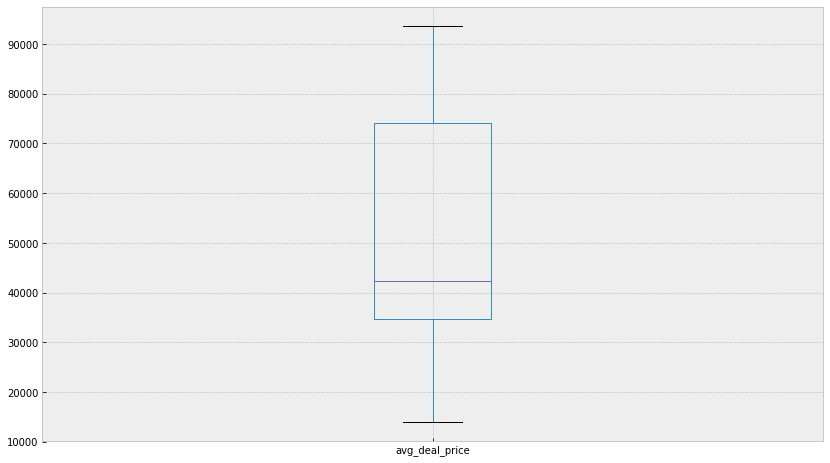

In [240]:
data_test['avg_deal_price'].plot(kind='box', figsize=(14, 8));

### Implementando uma Regressão Linear

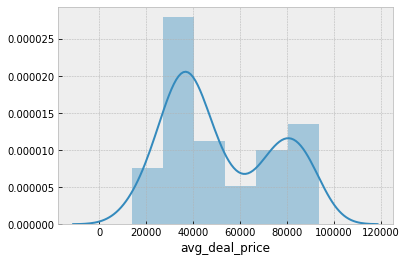

In [241]:
sns.distplot(data_test['avg_deal_price'])

In [242]:
y = data_test['avg_deal_price']
X = data_test[['Date']]

In [243]:
# importando a biblioteca do scikit learn para fazer o treinamento dos dados em dados de treinamento e dados de teste
from sklearn.model_selection import train_test_split

In [244]:
# treinando os dados em dados de treinamento e dados de dados
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.4,random_state=101)

In [245]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [246]:
# Printando a intercepção
print(lm.intercept_)

-8586820.29781


In [247]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Date,4297.874171


### Predições do modelo de machine learning

In [248]:
predictions = lm.predict(X_test)

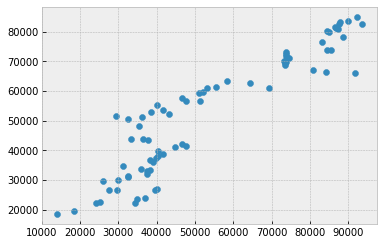

In [249]:
plt.scatter(y_test,predictions)

Text(0,0.5,'Predicted Y')

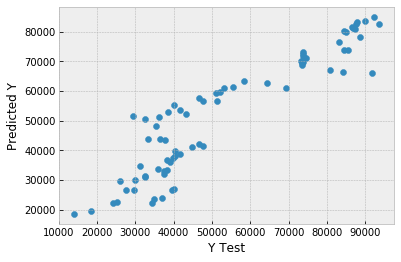

In [250]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Métricas de avaliação de regressão

Aqui estão três métricas de avaliação comuns para problemas de regressão:

Mean absolute error (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Square Error (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparando estas métricas:

MAE é o mais fácil de entender, porque é o erro médio.
MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
Todas estas são funções de perda , porque queremos minimizá-las.

In [251]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6926.35351442
MSE: 74863651.197
RMSE: 8652.37835494


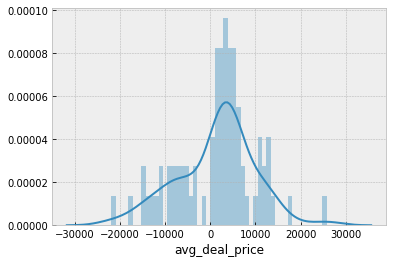

In [252]:
sns.distplot((y_test-predictions),bins=50);

## Testes com bibliotecas de Time Series Forecasting

### Implementação de uma tabela de valores aleatórios para geração de uma decomposição

In [253]:
df = pd.DataFrame(np.random.random((500,5)))
df.index = pd.DatetimeIndex(freq="w", start=0, periods=500)
df.head(3)

,0,1,2,3,4
1970-01-04,0.395158,0.587950,0.336848,0.856101,0.744053
1970-01-11,0.275418,0.047212,0.969051,0.536452,0.053446
1970-01-18,0.241563,0.511062,0.986061,0.181791,0.180059


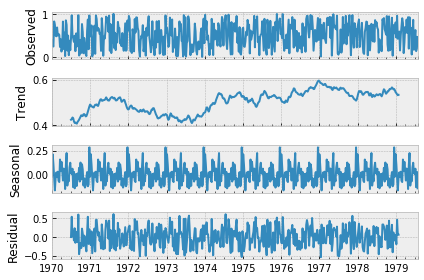

In [254]:
decomp = sm.tsa.seasonal_decompose(df[0])
decomp.plot()
plt.show()

### Testando uma implementação da Decomposição no dataset do projeto

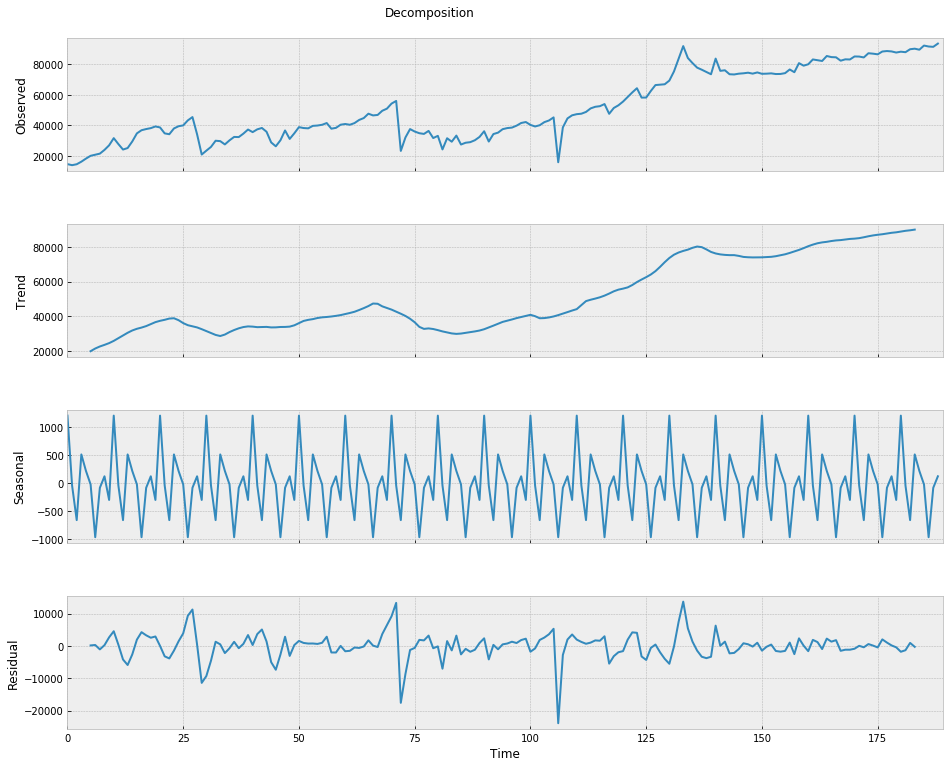

In [257]:
# importação das bibliotecas do statsmodels, uma das bibliotecas principais envolvidas no forecasting
import statsmodels.api as sm
import statsmodels
import statsmodels.graphics as graf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# criação da variavel forecasting para ser a base dos gráficos
forecasting = data_test['avg_deal_price']

# criação da variavel decomposition
decomposition = sm.tsa.seasonal_decompose(np.asarray(forecasting), freq=10)

# definir os output dos gráficos como arquivos internos
%matplotlib inline

# definições dos gráficos que serão o output
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(12)
fig.suptitle('Decomposition')
plt.show()

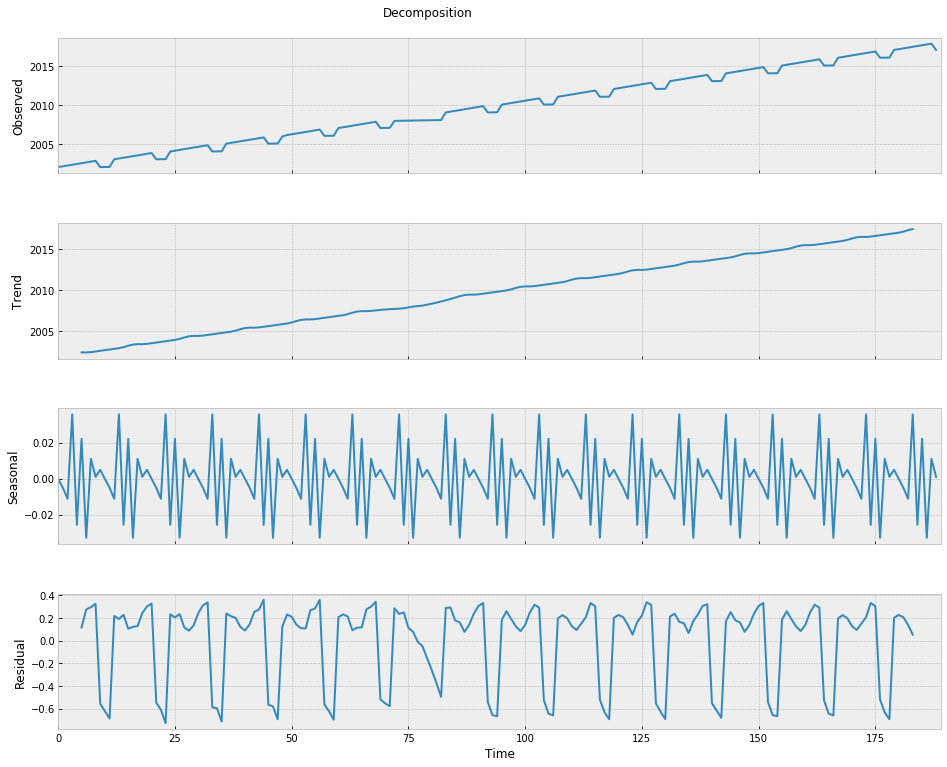

In [258]:
# importação das bibliotecas do statsmodels, uma das bibliotecas principais envolvidas no forecasting
import statsmodels.api as sm
import statsmodels
import statsmodels.graphics as graf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# criação da variavel forecasting para ser a base dos gráficos
forecasting = data_test['Date']

# criação da variavel decomposition
decomposition = sm.tsa.seasonal_decompose(np.asarray(forecasting), freq=10)

# definir os output dos gráficos como arquivos internos
%matplotlib inline

# definições dos gráficos que serão o output
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(12)
fig.suptitle('Decomposition')
plt.show()

In [259]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,test_forecasting
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


In [260]:
# doc com as funções do seasonal_decompose
print (sm.tsa.seasonal_decompose.__doc__)


    Seasonal decomposition using moving averages

    Parameters
    ----------
    x : array-like
        Time series
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by two_sided.
    freq : int, optional
        Frequency of the series. Must be used if x is not  a pandas object.
        Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    two_sided : bool
        The moving average method used in filtering.
        If True (default), a centered moving average is computed using the filt.
        If False, the filter coefficients are for past values only.

    Returns
    -------
    results : obj
        A object with seasonal, trend, and resid attributes.

    Notes
    -----
    This is a naive decomposition. 